<a href="https://colab.research.google.com/github/prasanth59/Work/blob/master/Final_submission_Post_Wise_chunking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions
!pip install langdetect

     |████████████████████████████████| 327kB 4.3MB/s 
     |████████████████████████████████| 266kB 6.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85392 sha256=df3b9476a938824f7b4b808c36a8b345f7633a3c97a50b1c846d0fdc2b2fa64d
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
     |████████████████████████████████| 983kB 6.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=fcb71bea7a1a7a6ec0b6406ea4d6d746d2de5586b1d4f3a7bce9e872dbd66327
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !cp "/content/english_blog_corpus_dict.pickle" "/content/drive/MyDrive/blog_post_wise_dict.pickle" 
!cp '/content/drive/MyDrive/final_embeddings_dict.pickle' '/content/final_embeddings_dict.pickle'
!cp '/content/drive/MyDrive/all_processed_final_min_sentence_length_dict.pickle' '/content/all_processed_final_min_sentence_length_dict.pickle'  
# !cp "/content/drive/MyDrive/blogs.zip" "/content/blogs.zip" 
# !unzip '/content/blogs.zip'

In [ ]:
from bs4 import BeautifulSoup
import os 
import pandas as pd
import contractions
import nltk
from nltk.tokenize import sent_tokenize
# from spacy.lang.en.stop_words import STOP_WORDS
import pickle
from langdetect import detect
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Extract content from post tag in blog

In [ ]:
def get_file_content(path,file_names,en):
  """Returns blog content in <p> tags in html file """
  file_text = {}
  lang_exception = []
  for file_name in file_names:
    if file_name.strip().split(".")[0] in en:
      posts_list = []
      try:
        with open(path+file_name, "r",encoding='utf-8-sig',errors='ignore') as file_obj:
          contents = file_obj.read()
          soup = BeautifulSoup(contents, 'lxml')
          for tag in soup.find_all("post"):
            temp = tag.text.replace("\\", "").replace("\t",'').replace("\n",'').replace('urlLink','').lower()
            # print(temp)
            if detect(temp)== 'en':
              if len(temp.split()) > 10:
                temp = ' '.join([(contractions.fix(word)) for word in temp.split()])
                posts_list.append(temp)
      except IOError:
        print("Error: Input XML files not found ",file_name)
        pass
      except:
        print('Language detection error',file_name.strip().split(".")[0])
        lang_exception.append(file_name.strip().split(".")[0])
        pass
      # print(file_name.strip().split(".")[0])
      file_text[file_name.strip().split(".")[0]] = posts_list
  return file_text,lang_exception

In [ ]:
path = '/content/blogs/'
files_list = os.listdir(path)
total_content,lang_exception = get_file_content(path,files_list,file_chunk_content.keys())

# pickle.dump(file_chunk_content,open('en_chunk_wise_dict.pickle','wb'),protocol= pickle.HIGHEST_PROTOCOL)
len(lang_exception),len(total_content)

In [ ]:
# Method to detect the non english blogs in the corpus
def remove_non_english_blog(file_dict):
  non_en = []
  for key in file_dict.keys():
    try:
      lang = detect(file_dict[key])
      if lang!= 'en':
        # print(lang,key)
        non_en.append(key)
    except :
      print('Error in Key value',key)
      non_en.extend(key)
      continue
  
  for key in non_en:
    try:
      file_dict.pop(key)
    except:
       print('Error in Key value',key)
       continue

  return file_dict

# file_chunk_content = remove_non_english_blog(file_chunk_content)

# Perform preprocessing on the extracted chunks(posts) from blogs

In [ ]:

# Remove the punctuations from the sentences
def remove_punctuation(content):
  return ' '.join([token for token in content.split() if token.isalpha() == True])

# Method to perform preprocessing task
def preprocess_text(blog_text):
  sentences = nltk.sent_tokenize(blog_text)
  sentences = [remove_punctuation(sentence) for sentence in sentences]
  sentences = ' '.join(sentences)
  return sentences

In [ ]:
# Perform preprocessing on the blog content
def get_preprocessed_content(blog_content)
  testing_blogs = {}
  for index, key in enumerate(list(blog_content.keys())):
    testing_blogs[key] = list(map(preprocess_text,blog_content[key]))
    if index%1000 == 0:
          print('Preprocessing done for ', index)
  return blog_content

Preprocessing done for  0
Preprocessing done for  1000
Preprocessing done for  2000
Preprocessing done for  3000
Preprocessing done for  4000
Preprocessing done for  5000
Preprocessing done for  6000
Preprocessing done for  7000
Preprocessing done for  8000
Preprocessing done for  9000
Preprocessing done for  10000
Preprocessing done for  11000
Preprocessing done for  12000
Preprocessing done for  13000
Preprocessing done for  14000
Preprocessing done for  15000
Preprocessing done for  16000
Preprocessing done for  17000
Preprocessing done for  18000
Preprocessing done for  19000


In [ ]:
# preprocess_pipeline = set_preprocess_pipeline()
file_chunk_content = pickle.load(open('en_chunk_wise_dict.pickle','rb'))

In [ ]:
# pickle.dump(testing_blogs,open('all_processed_final_min_sentence_length_dict.pickle','wb'),protocol= pickle.HIGHEST_PROTOCOL)
# !cp "/content/all_processed_final_min_sentence_length_dict.pickle" "/content/drive/MyDrive/all_processed_final_min_sentence_length_dict.pickle" 

In [ ]:
testing_blogs = pickle.load(open('/content/all_processed_final_min_sentence_length_dict.pickle','rb'))

# Generate embeddings for each post (chunk) in the blog

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/3"
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.load(module_url)

In [ ]:
blog_embedding = {}
for index, key in enumerate(list(testing_blogs.keys())):
  # print(key)
  blog_embedding [key] = [embed([post])['outputs'].numpy().reshape(1,-1) for post in testing_blogs[key]]
  if index%1000 == 0:
    print('Embeddings generated for ', index)

Embeddings generated for  0
Embeddings generated for  1000
Embeddings generated for  2000
Embeddings generated for  3000
Embeddings generated for  4000
Embeddings generated for  5000
Embeddings generated for  6000
Embeddings generated for  7000
Embeddings generated for  8000
Embeddings generated for  9000
Embeddings generated for  10000
Embeddings generated for  11000
Embeddings generated for  12000
Embeddings generated for  13000
Embeddings generated for  14000
Embeddings generated for  15000
Embeddings generated for  16000
Embeddings generated for  17000


In [ ]:
pickle.dump(blog_embedding,open('final_embeddings_dict.pickle','wb'),protocol= pickle.HIGHEST_PROTOCOL)
!cp "/content/final_embeddings_dict.pickle" "/content/drive/MyDrive/final_embeddings_dict.pickle" 
# blog_embedding = pickle.load(open('embeddings_dict.pickle','rb'))
# non_eng_list = pickle.load(open('non_english_list.pickle','rb'))

In [ ]:
for item in non_eng_list:
  blog_embedding.pop(item)

In [ ]:
query = 'I like to work on NLP'
embed_query = embed([query])['outputs'][0].numpy().reshape(1,-1)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
similarity = {}
for key in blog_embedding.keys():
  post_sim  = []
  for item in blog_embedding[key]:
    # print(item.shape,embed_query.shape)
    # print(type(item),type(embed_query))
    # print(item)
    # break
    post_sim.append(cosine_similarity(item.reshape(1,-1),embed_query))
  try:  
    similarity[key] = (np.max(post_sim),np.argmax(post_sim))
  except ValueError:
    pass
  # similarity[key] = (np.mean(post_sim))
  # break
# embed_query['outputs'][0]


In [ ]:
similarity = sorted(similarity.items(), key=lambda x: x[1], reverse=True)

In [ ]:
similarity[:10]

[('3402723', (0.6274451, 26)),
 ('3170429', (0.6274451, 23)),
 ('1939766', (0.4061011, 229)),
 ('2931757', (0.37065983, 25)),
 ('741128', (0.369321, 8)),
 ('3641696', (0.36682174, 14)),
 ('3378893', (0.3538587, 7)),
 ('1453177', (0.34236848, 367)),
 ('2543400', (0.34165213, 49)),
 ('3329341', (0.3404879, 3))]

In [ ]:
testing_blogs['3329341'][4]

'traveling is getting even though i do not have to travel i would rather spend the time with my family every i complain about this too but i love being home and doing things with the it is hot and calm here i guess the kids were out for five minutes and came back in because they were too supposed to get close to still working to get our i called the store we got the four gallons from to see if we could order just two more the guy looked and found one more and said he would set it aside for nancy went up but the guy i talked to was not there and no one else could find where he had put the so she went home they told her now that more should come in either today or i will stop in tomorrow to see if some came otherwise nancy will have her mom try to get as they are still planning to come for the never imagined it would be such a saga to purchase the remainder of our please keep your voice thank'

In [ ]:
sample_sentences = ['I am always interested in reading',
                    'It is so cold outside',
                    'I purchased books',
                    'NLP is interesting',
                    'sentence encoder gives embeddings']
# query_term = []
# sample_query_embedding = embed(query_term)['outputs'][0].numpy().reshape(1,-1)
sample_sentence_embedding = [ embed([item])['outputs'][0].numpy().reshape(1,-1) for item in sample_sentences ]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Use PCA to reduce the dimensions of the embedding
def pca_transform(sentence_embeddings,dim):
    vectors = np.vstack((item for item in sentence_embeddings))
    # sentence_embeddings[0], sentence_embeddings[1], sentence_embeddings[2]
    # Set the number of dimensions PCA will reduce to
    pca = PCA(n_components=dim)
    pca.fit(vectors)
    new_pca = pca.transform(vectors)
    print("original shape:   ", vectors.shape)
    print("transformed shape:", new_pca.shape)
    return(new_pca)

new_dim = pca_transform(sample_sentence_embedding, 2)

original shape:    (5, 512)
transformed shape: (5, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


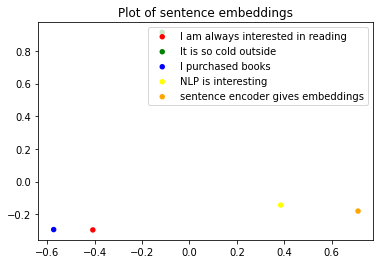

In [ ]:
# Draw a 2d graph with the new dimensions
def two_d_graph(sample_sentences,reduced_dims):
    colors = ("red", "green", "blue",'yellow','orange')
    groups = (item for item in sample_sentences) 
    # sample_sentences[0], sample_sentences[1], sample_sentences[2]
    # Create plot
    fig = plt.figure()
    ax = fig.gca()
 
    for data, color, group in zip(reduced_dims, colors, groups):
        x, y = data
        ax.scatter(x, y, c=color, edgecolors='none', s=30, label=group)
 
    plt.title('Plot of sentence embeddings')
    plt.legend(loc=1)
    plt.rcParams["figure.figsize"] = (8,15)
    plt.show()

two_d_graph(sample_sentences,new_dim)

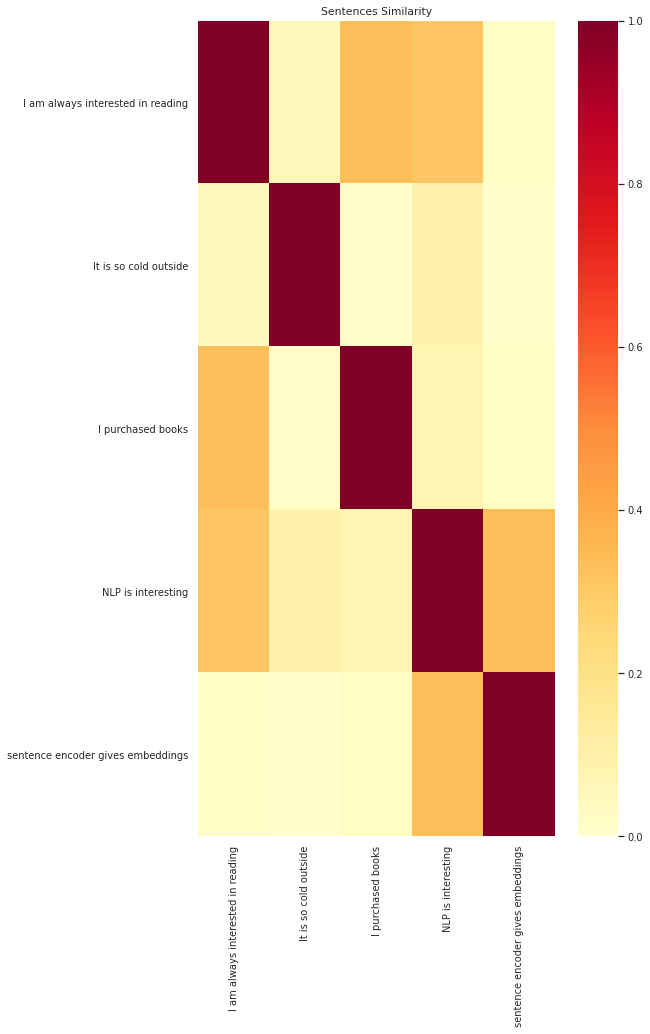

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features).reshape(len(labels),len(labels))
  sns.set(font_scale=0.9,)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  # plt.figure(figsize=(10,8))
  # plt.subplots(figsize=(6, 6))
  # g.figsize=(10,5)
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Sentences Similarity")
  # print(corr)

def run_and_plot(sentences,embeddings):
  # message_embeddings_ = embed(messages_)
  plot_similarity(sentences, embeddings, 90)

run_and_plot(sample_sentences,sample_sentence_embedding)